Loading ROC data from pickle files...
Loaded Decision Tree ROC data from DTmodel.pickle
Loaded Logistic Regression ROC data from Reg.pickle
Loaded Neural Network ROC data from nn_combined_models.pickle

--- Task 5.1: Generating Combined ROC Curve Plot ---


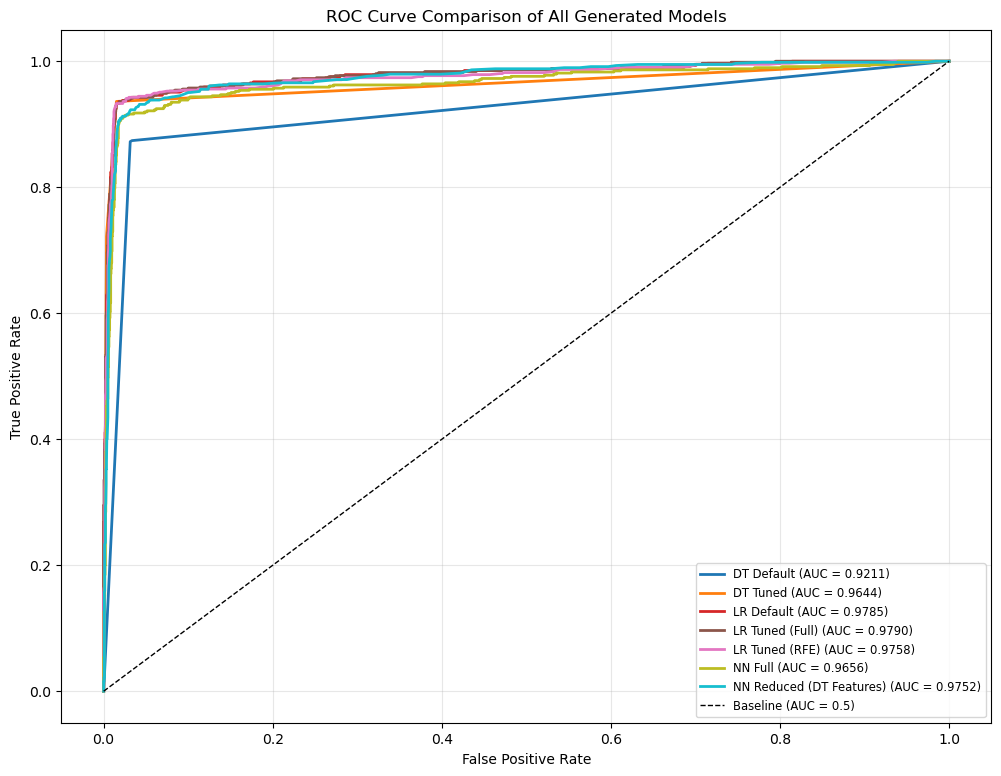

Combined ROC plot generated and saved.


In [17]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# --- Configuration ---
DT_PICKLE_FILE = 'DTmodel.pickle'
LR_PICKLE_FILE = 'Reg.pickle'
NN_PICKLE_FILE = 'nn_combined_models.pickle'

# --- Load ALL Saved ROC Data from Pickle Files ---
print("Loading ROC data from pickle files...")
roc_data = {} # Dictionary to store loaded data {label: (fpr, tpr, auc)}

try:
    # Load Decision Tree Data
    with open(DT_PICKLE_FILE, 'rb') as f_dt:
        dt_data_loaded = pickle.load(f_dt)
        # Unpack: [default_model, default_auc, default_fpr, default_tpr,
        #          best_tuned_model, best_auc, best_fpr, best_tpr]
        roc_data['DT Default'] = (dt_data_loaded[2], dt_data_loaded[3], dt_data_loaded[1])
        roc_data['DT Tuned'] = (dt_data_loaded[6], dt_data_loaded[7], dt_data_loaded[5])
    print(f"Loaded Decision Tree ROC data from {DT_PICKLE_FILE}")

    # Load Logistic Regression Data
    with open(LR_PICKLE_FILE, 'rb') as f_lr:
        lr_data_loaded = pickle.load(f_lr)
        # Unpack: [default_model, default_auc, default_fpr, default_tpr,
        #          tuned_full_model, tuned_full_auc, tuned_full_fpr, tuned_full_tpr,
        #          rfe_object,
        #          tuned_rfe_model, tuned_rfe_auc, tuned_rfe_fpr, tuned_rfe_tpr]
        roc_data['LR Default'] = (lr_data_loaded[2], lr_data_loaded[3], lr_data_loaded[1])
        roc_data['LR Tuned (Full)'] = (lr_data_loaded[6], lr_data_loaded[7], lr_data_loaded[5])
        roc_data['LR Tuned (RFE)'] = (lr_data_loaded[11], lr_data_loaded[12], lr_data_loaded[10])
    print(f"Loaded Logistic Regression ROC data from {LR_PICKLE_FILE}")

    # Load Neural Network Data
    with open(NN_PICKLE_FILE, 'rb') as f_nn:
        nn_data = pickle.load(f_nn)
        # Unpack: [[full_model, full_auc, full_fpr, full_tpr], [reduced_model, reduced_auc, reduced_fpr, reduced_tpr]]
        roc_data['NN Full'] = (nn_data[0][2], nn_data[0][3], nn_data[0][1])
        roc_data['NN Reduced (DT Features)'] = (nn_data[1][2], nn_data[1][3], nn_data[1][1])
    print(f"Loaded Neural Network ROC data from {NN_PICKLE_FILE}")

except FileNotFoundError as e:
    print(f"Error loading pickle file: {e}")
    print("Please ensure ALL pickle files from previous tasks exist.")
    exit()
except Exception as e:
    print(f"An error occurred loading data: {e}")
    exit()

# --- Task 5.1: Plot ALL ROC Curves ---
print("\n--- Task 5.1: Generating Combined ROC Curve Plot ---")

plt.figure(figsize=(12, 9)) # Make figure a bit larger for many curves

# Define colors for better distinction if needed
colors = plt.cm.get_cmap('tab10', len(roc_data)) # Use a colormap

i = 0
for label, (fpr, tpr, auc_score) in roc_data.items():
    if fpr is not None and tpr is not None and auc_score is not None:
        plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.4f})', linewidth=2, color=colors(i))
        i += 1
    else:
        print(f"Warning: ROC data missing or incomplete for {label}")


plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Baseline (AUC = 0.5)') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of All Generated Models')
plt.legend(loc='lower right', fontsize='small') # Adjust legend position and size
plt.grid(True, alpha=0.3)
plt.savefig('final_roc_comparison_all_models.png', dpi=300, bbox_inches='tight')
plt.show()
print("Combined ROC plot generated and saved.")